# Requirements

In [117]:
import pandas as pd
import missingno as msno
import numpy as np

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

## Obesity Analysis


# Dataset Description

## Attributes

- id: represents a unique identifier for each participant or record in the dataset.
- Gender: Represents the gender of the individual.
- Age: Indicates the age of the individual.
- Height - Represents the height of the individual.
- Weight: Represents the weight of the individual.
- FCVC Frequency of Consumption of Vegetables
- NCP - Number of Main Meals per Day
- SMOKE - Indicates whether the individual smokes
- CH2O - Consumption of Water
- TUE - Time Using Electronic Devices
- MTRANS - Mode of Transportation
- NObeyesdad - Nutritional Obesity Status, obesity class

### Target variable
- FAF Frequency of Physical Activity

# Read the dataset

In [122]:
data = pd.read_csv("obesity.csv")

In [123]:
data.sample(3)

,Unnamed: 0,id,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
12970,12970,12970.0,Female,16.380090,1.606810,45.000000,NaN,3.0,no,NaN,2.614909,0.953841,Public_Transportation,Insufficient_Weight
7009,7009,7009.0,Female,21.840654,1.792833,137.858254,3.0,NaN,no,2.531456,1.931173,NaN,Public_Transportation,Obesity_Type_III
12055,12055,12055.0,Male,23.963649,1.790151,105.037203,2.0,3.0,NaN,2.331123,0.008368,0.993786,Public_Transportation,NaN


Explore the dataset using visualizations of your choice.

In [125]:
data = data.drop(columns=['Unnamed: 0','id'])

In [126]:
data.sample(3)

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
6739,Female,21.0,1.62,70.0,NaN,1.0,no,2.0,NaN,0.0,Public_Transportation,Overweight_Level_I
5208,NaN,18.0,NaN,50.0,1.0,3.0,no,1.0,1.0,1.0,Public_Transportation,NaN
10121,Female,18.0,1.70,78.0,3.0,3.0,no,1.0,1.0,1.0,Public_Transportation,Overweight_Level_II


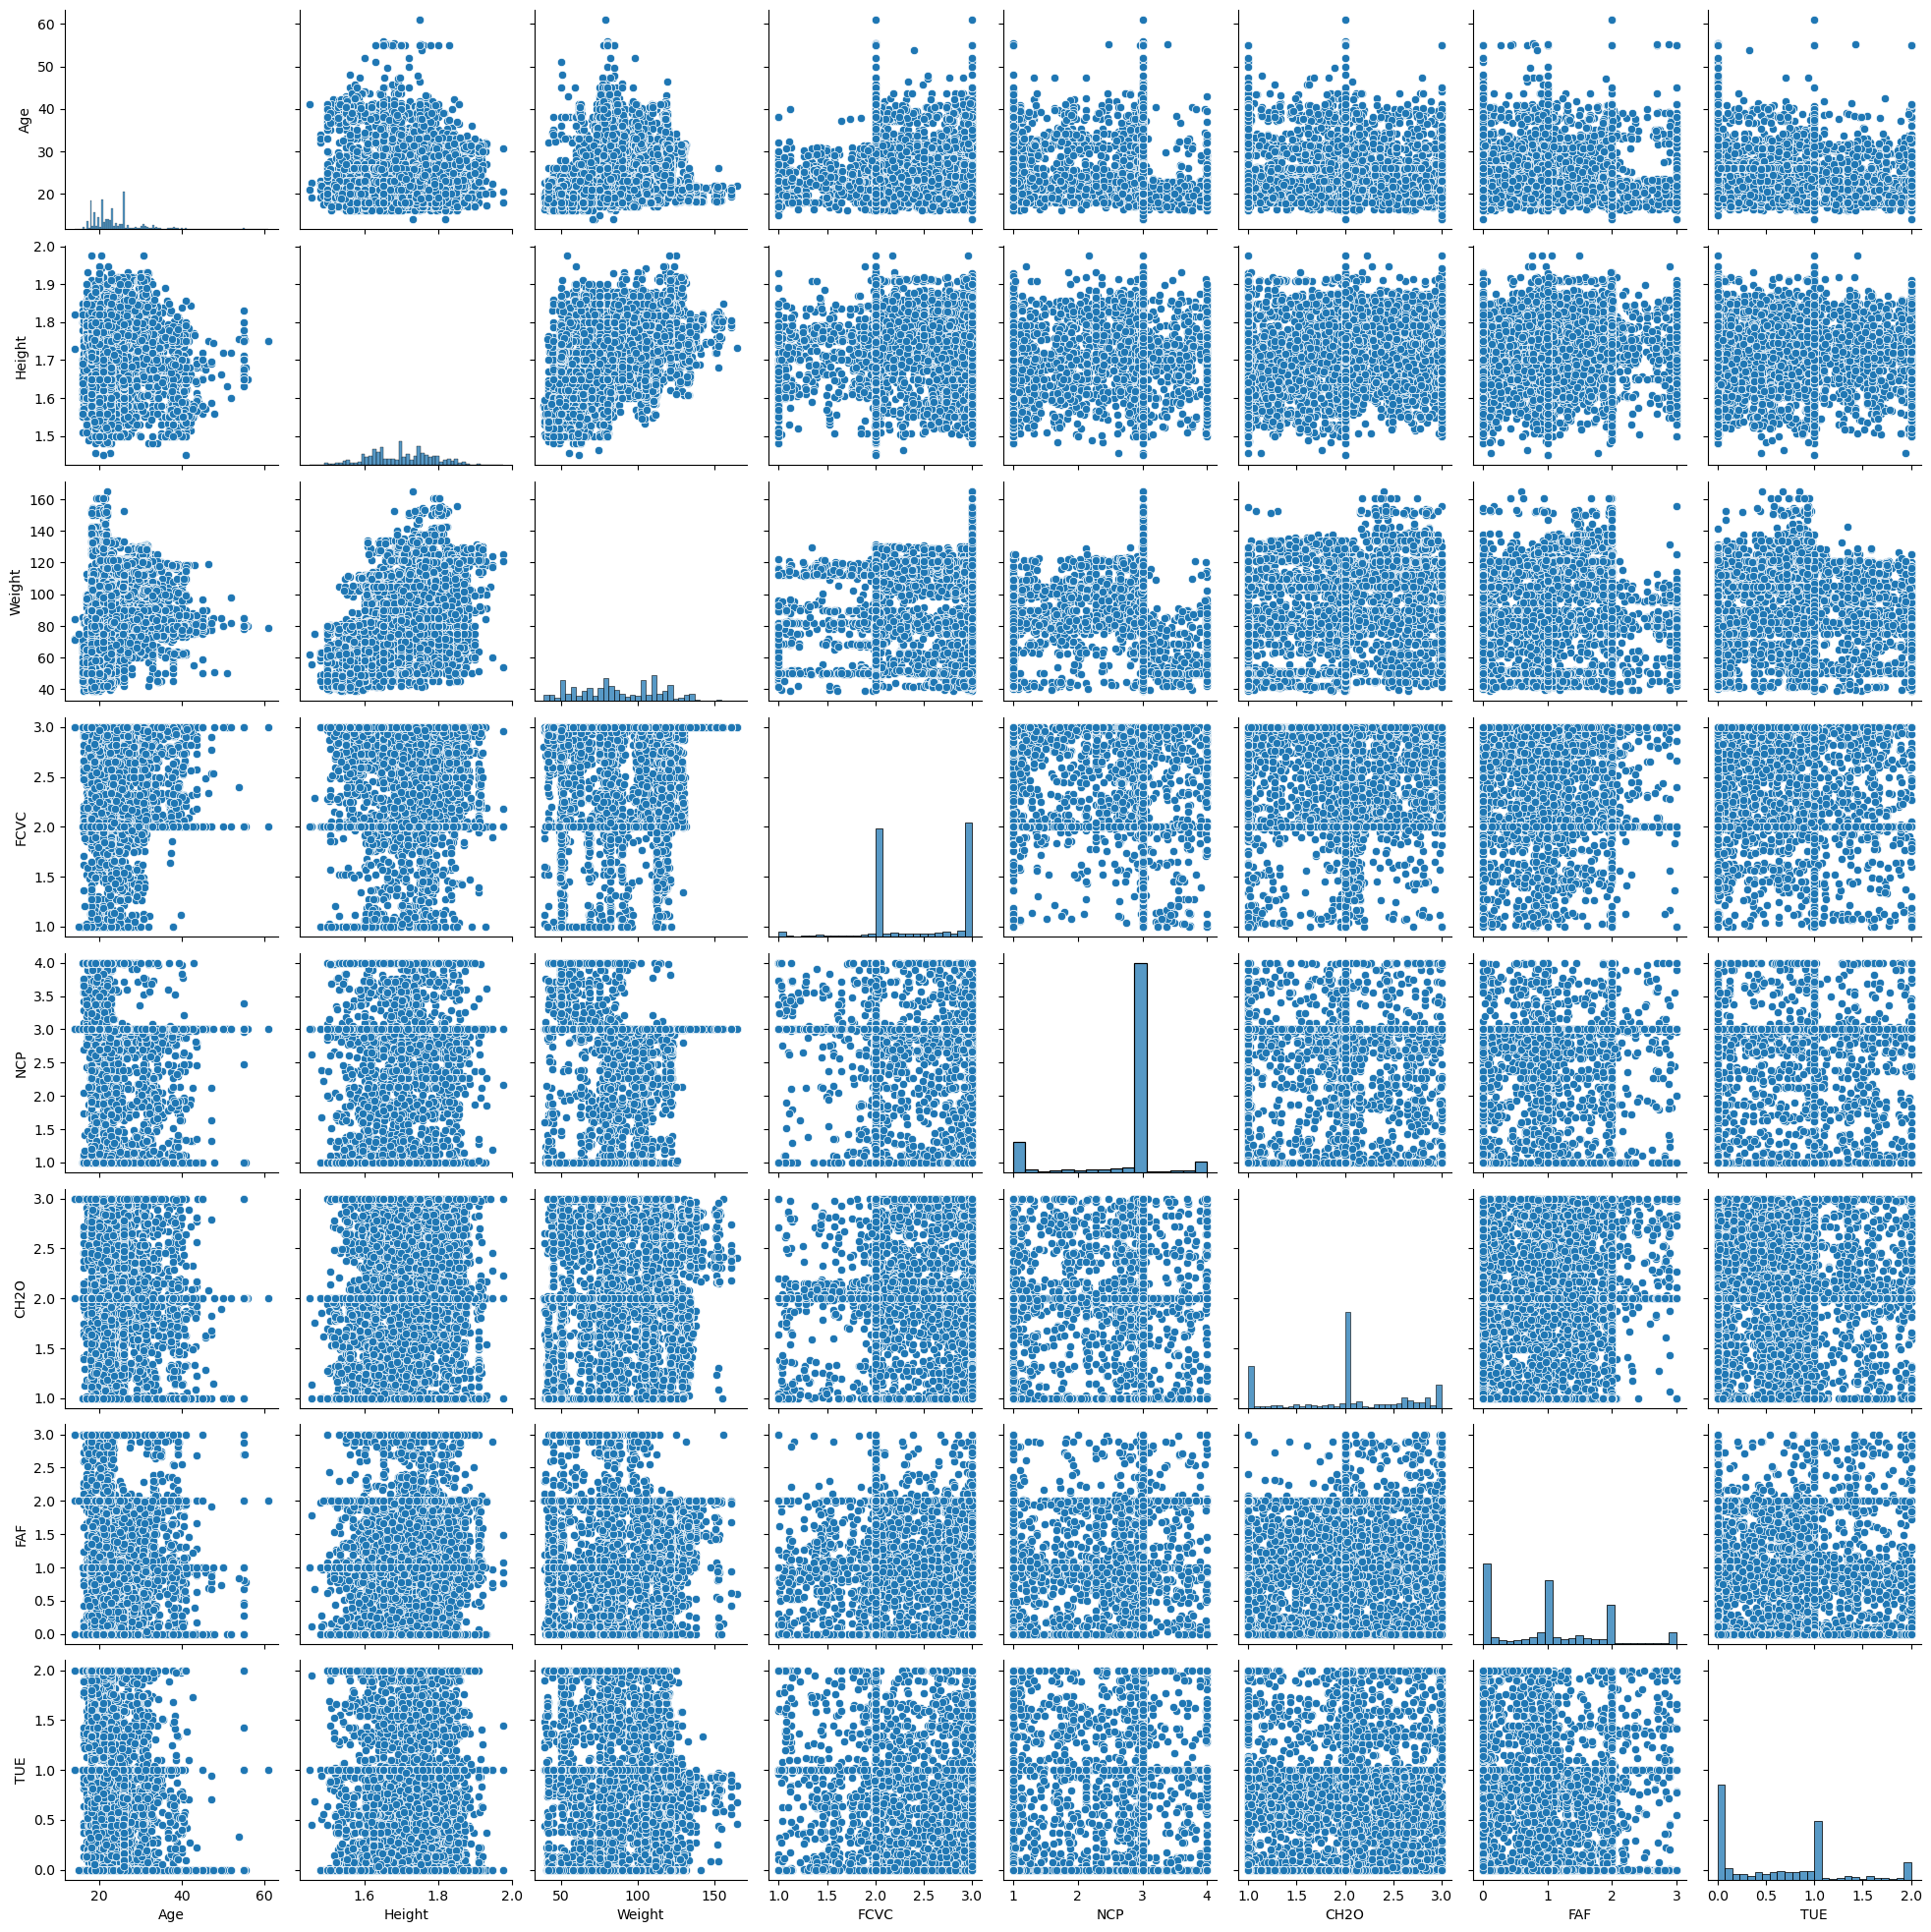

In [127]:
sns.pairplot(data)

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      16634 non-null  object 
 1   Age         16608 non-null  float64
 2   Height      16667 non-null  float64
 3   Weight      16477 non-null  float64
 4   FCVC        16641 non-null  float64
 5   NCP         16697 non-null  float64
 6   SMOKE       16648 non-null  object 
 7   CH2O        16597 non-null  float64
 8   FAF         16619 non-null  float64
 9   TUE         16611 non-null  float64
 10  MTRANS      16600 non-null  object 
 11  NObeyesdad  16625 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.9+ MB


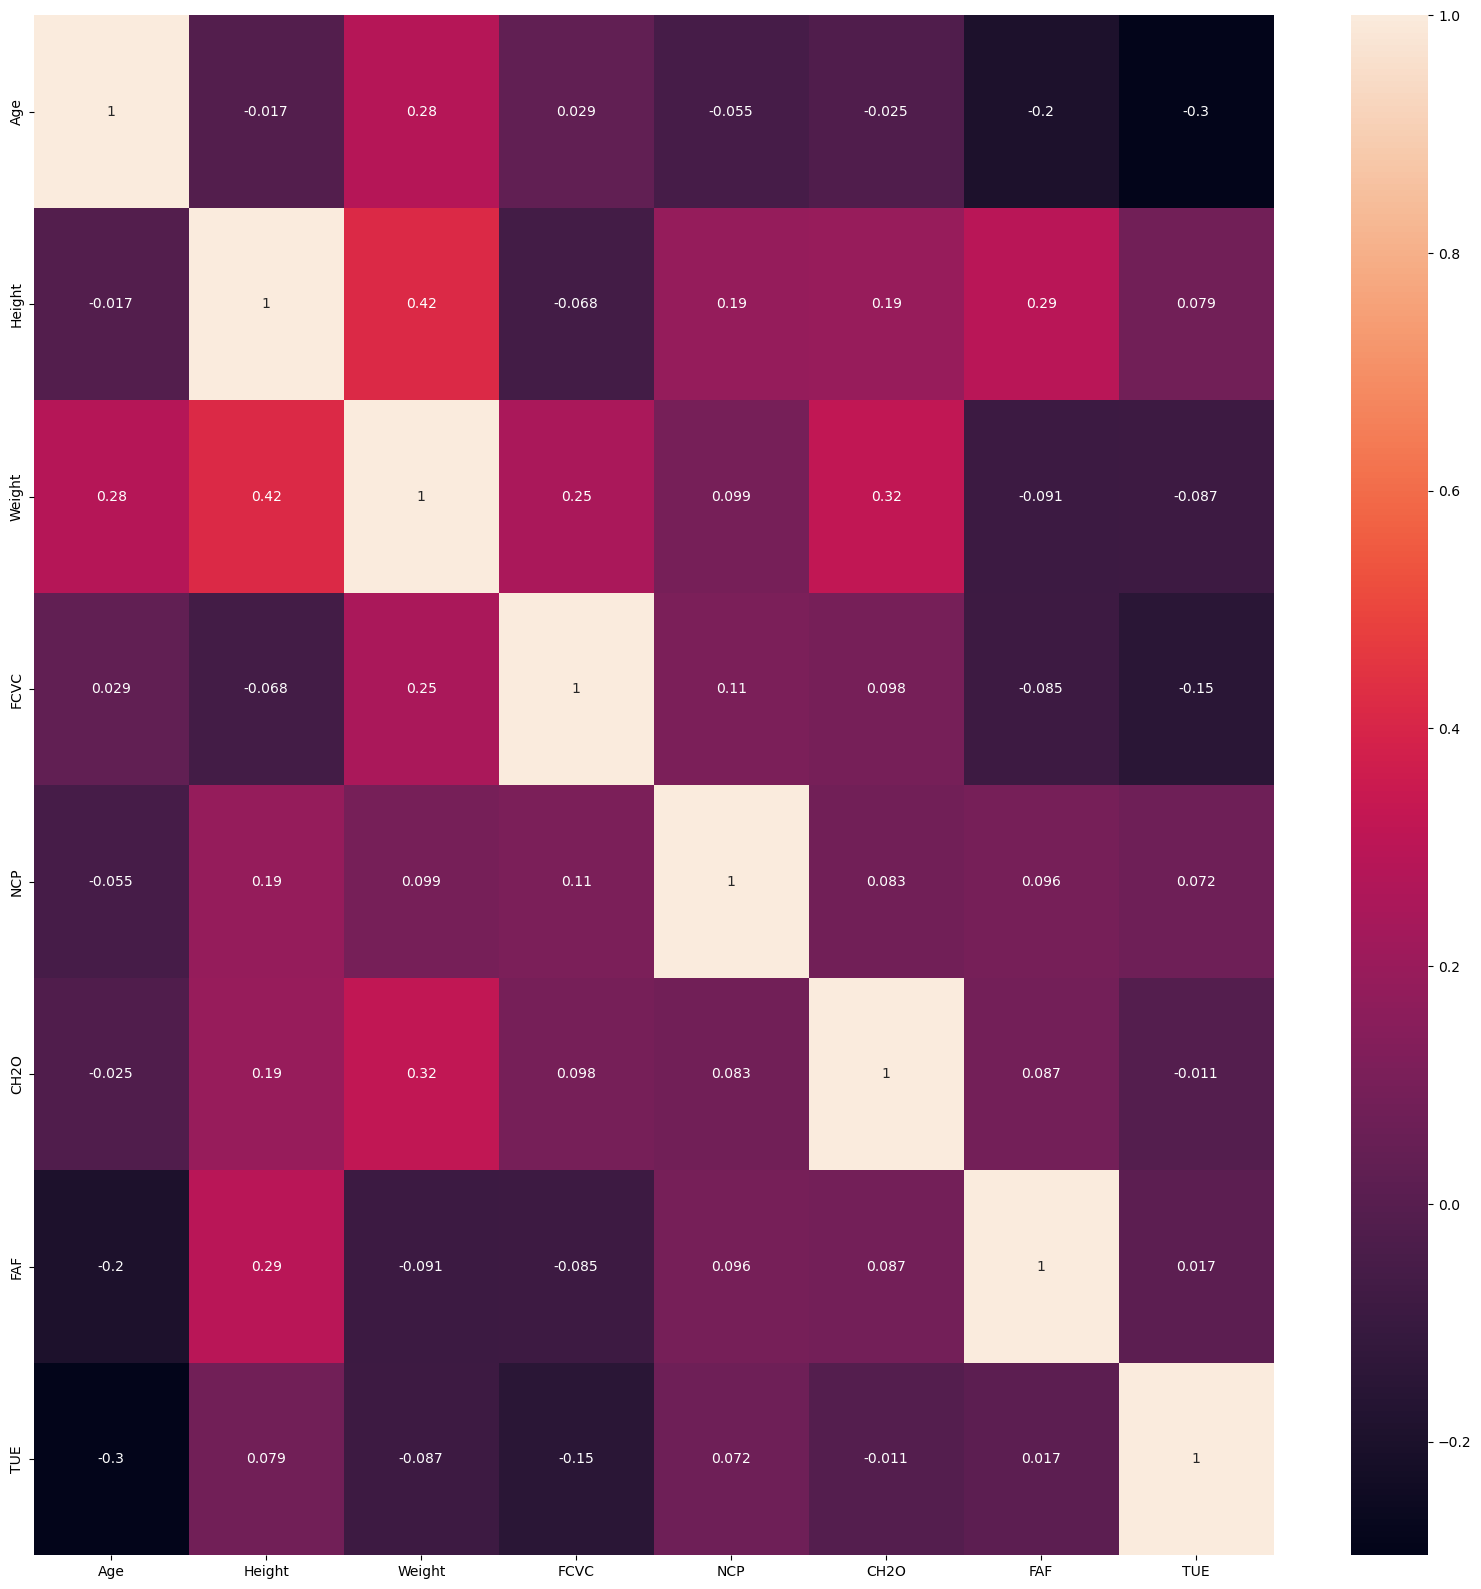

In [129]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.drop(columns=['Gender', 'SMOKE','MTRANS','NObeyesdad']).corr(), annot=True) 
plt.show()

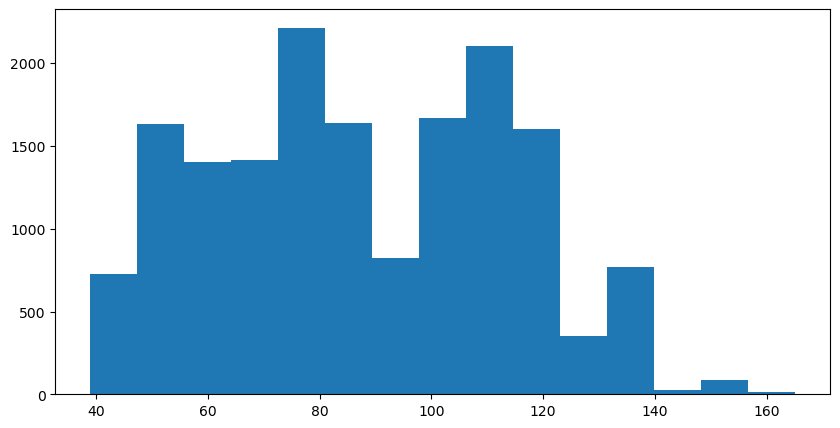

In [130]:
plt.figure(figsize=(10, 5))
plt.hist(data['Weight'], bins=15)
plt.show()

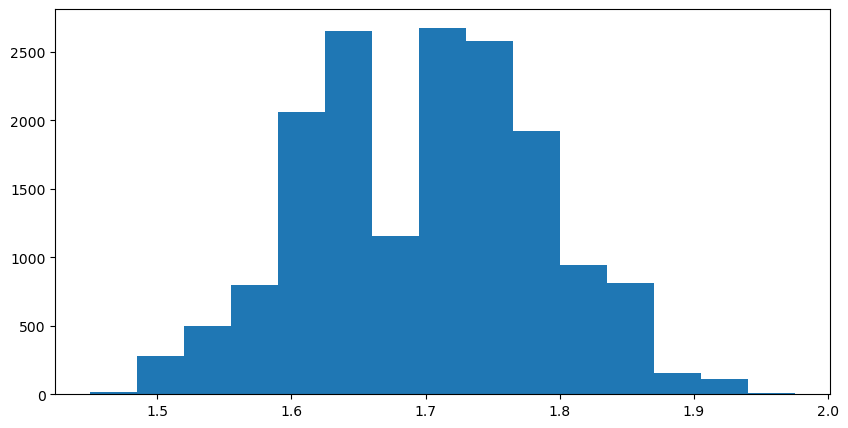

In [131]:
plt.figure(figsize=(10, 5))
plt.hist(data['Height'], bins=15)
plt.show()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [133]:
missing_percent = data.isnull().sum() / len(data) * 100
missing_percent = missing_percent.reset_index().rename(columns={"index": "column", 0: "percent missing"})
missing_percent

,column,percent missing
0,Gender,19.867039
1,Age,19.992292
2,Height,19.708064
3,Weight,20.623374
4,FCVC,19.833317
5,NCP,19.563542
6,SMOKE,19.799595
7,CH2O,20.045284
8,FAF,19.939301
9,TUE,19.977840


In [134]:
data.sample(3)

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
18018,Female,29.669219,1.650012,89.496905,2.971574,1.971472,no,1.879381,1.874662,0.0,Automobile,Obesity_Type_I
14945,Male,40.000000,1.800000,92.000000,3.000000,NaN,no,2.000000,NaN,0.0,NaN,Overweight_Level_II
6111,Female,NaN,1.710000,50.000000,2.000000,3.000000,no,1.000000,1.000000,1.0,Public_Transportation,Obesity_Type_I


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

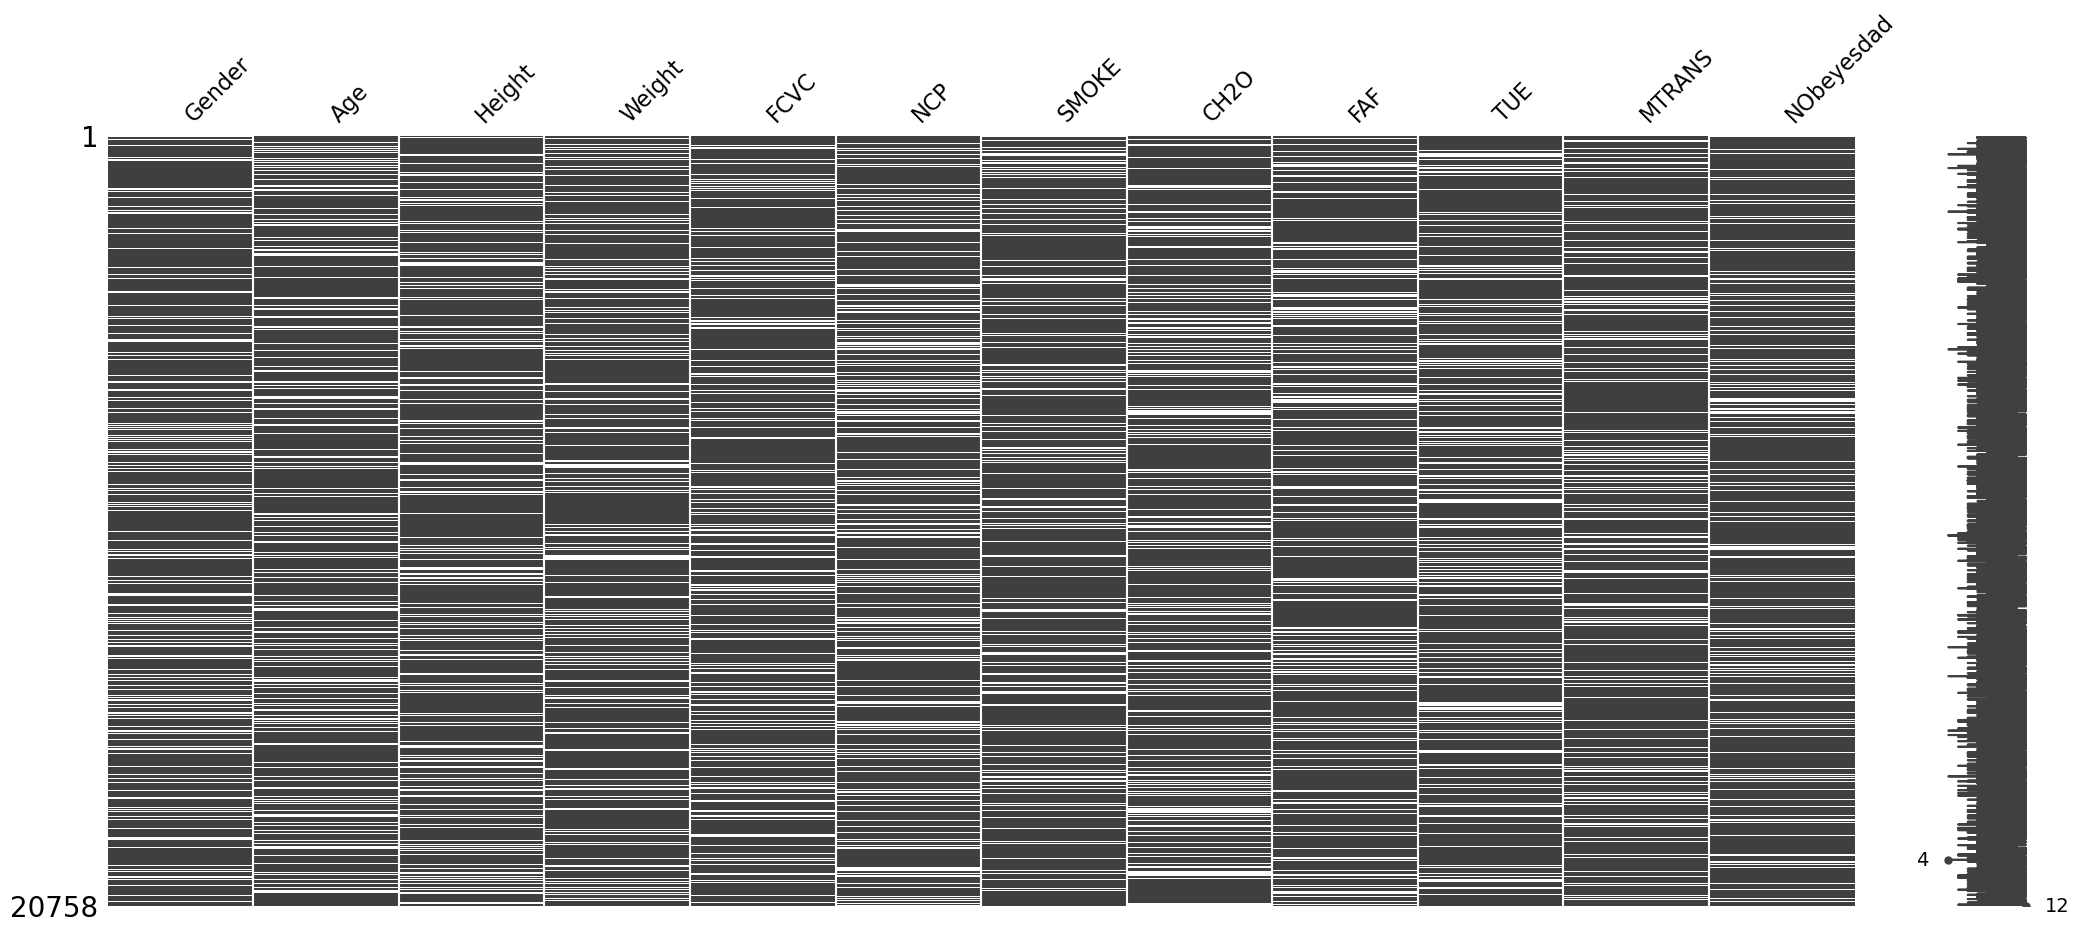

In [136]:
msno.matrix(data)
plt.show()

<Axes: >

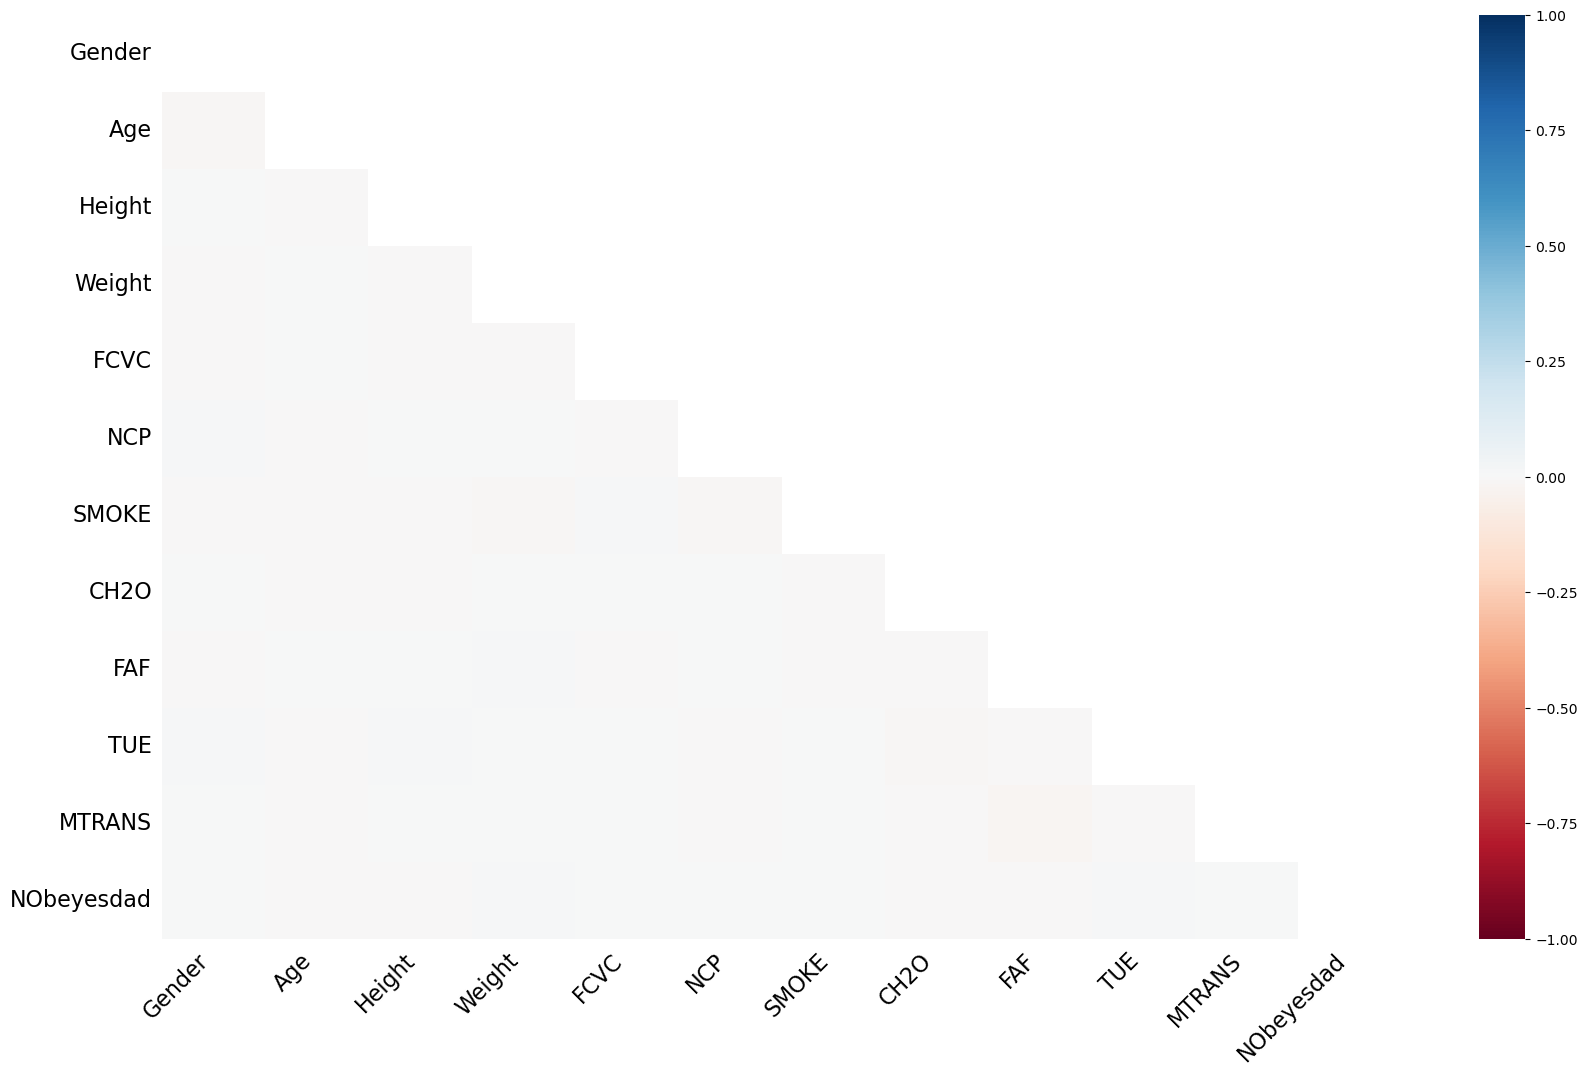

In [137]:
msno.heatmap(data)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [139]:
data.sample(5)

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
119,Male,NaN,NaN,58.0,2.0,3.0,no,1.0,1.0,1.0,Public_Transportation,Normal_Weight
15908,NaN,NaN,1.7200,68.0,2.0,3.0,no,2.0,0.0,1.0,Public_Transportation,NaN
4167,Female,18.391943,1.7199,NaN,NaN,NaN,no,NaN,0.0,NaN,Public_Transportation,Insufficient_Weight
11701,NaN,NaN,1.6600,58.0,3.0,3.0,no,NaN,1.0,0.0,Public_Transportation,Normal_Weight
15984,NaN,21.000000,1.6500,NaN,2.0,1.0,no,2.0,NaN,2.0,Public_Transportation,Overweight_Level_I


In [140]:
columns=['Age', 'Height','Weight','FCVC','NCP','CH2O','TUE']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[columns])

knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)

In [141]:
imputed_data = scaler.inverse_transform(imputed_data)
data[columns] = imputed_data

In [142]:
data.isnull().sum()

Gender        4124
Age              0
Height           0
Weight           0
FCVC             0
NCP              0
SMOKE         4110
CH2O             0
FAF           4139
TUE              0
MTRANS        4158
NObeyesdad    4133
dtype: int64

In [143]:
data.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [144]:
data.SMOKE.unique()

array(['no', nan, 'yes'], dtype=object)

In [145]:
data.MTRANS.unique()

array(['Public_Transportation', 'Automobile', nan, 'Walking', 'Motorbike',
       'Bike'], dtype=object)

In [146]:
data.NObeyesdad.unique()

array([nan, 'Normal_Weight', 'Insufficient_Weight', 'Overweight_Level_II',
       'Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_I',
       'Obesity_Type_III'], dtype=object)

In [147]:
data = data.dropna(subset=['FAF'], axis=0)

In [148]:
data.Gender=data.Gender.fillna('UNKNOWN')

C:\Users\dimit\AppData\Local\Temp\ipykernel_13620\3747144051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Gender=data.Gender.fillna('UNKNOWN')


In [149]:
data.isnull().sum()

Gender           0
Age              0
Height           0
Weight           0
FCVC             0
NCP              0
SMOKE         3293
CH2O             0
FAF              0
TUE              0
MTRANS        3381
NObeyesdad    3313
dtype: int64

In [150]:
data.sample(3)

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
14171,Female,37.631769,1.586751,79.165306,2.115029,3.0,no,2.124698,0.000000,0.000000,Automobile,Obesity_Type_I
2338,Female,18.000000,1.620000,50.000000,2.000000,3.8,NaN,1.000000,1.000000,1.000000,Public_Transportation,Insufficient_Weight
8527,Male,30.554956,1.787195,112.287678,1.926381,3.0,no,2.117733,0.334264,0.471663,Automobile,Obesity_Type_II


In [151]:
data.SMOKE=data.SMOKE.fillna(data.SMOKE.mode()[0])

C:\Users\dimit\AppData\Local\Temp\ipykernel_13620\100650763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.SMOKE=data.SMOKE.fillna(data.SMOKE.mode()[0])


In [152]:
data.MTRANS=data.MTRANS.fillna(data.MTRANS.mode()[0])
data.NObeyesdad=data.NObeyesdad.fillna(data.NObeyesdad.mode()[0])

C:\Users\dimit\AppData\Local\Temp\ipykernel_13620\1402289958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.MTRANS=data.MTRANS.fillna(data.MTRANS.mode()[0])
C:\Users\dimit\AppData\Local\Temp\ipykernel_13620\1402289958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.NObeyesdad=data.NObeyesdad.fillna(data.NObeyesdad.mode()[0])


In [153]:
data.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
FCVC          0
NCP           0
SMOKE         0
CH2O          0
FAF           0
TUE           0
MTRANS        0
NObeyesdad    0
dtype: int64

In [154]:
data.sample(3)

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
4886,Male,25.600000,1.85,84.029722,2.000000,4.000000,no,3.000000,2.000000,0.000000,Walking,Obesity_Type_III
4427,Female,18.346718,1.60,49.932199,2.794197,3.238258,no,1.530531,2.000000,1.000000,Public_Transportation,Insufficient_Weight
5202,Female,27.526869,1.55,62.894283,2.724121,1.717608,no,1.274718,0.174475,0.044954,Automobile,Overweight_Level_II


In [155]:
encoder = LabelEncoder()

for column in data.columns:
    if type(data[column].to_list()[0]) == str:
         data[column] = encoder.fit_transform(data[column])

C:\Users\dimit\AppData\Local\Temp\ipykernel_13620\2580460152.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = encoder.fit_transform(data[column])
C:\Users\dimit\AppData\Local\Temp\ipykernel_13620\2580460152.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = encoder.fit_transform(data[column])
C:\Users\dimit\AppData\Local\Temp\ipykernel_13620\2580460152.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [156]:
data.sample(3)

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
19274,2,17.039058,1.699568,73.311175,2.000000,2.77684,0,1.800000,0.0,1.365950,3,6
16928,0,24.362124,1.666023,68.818893,1.053534,1.00000,0,2.000000,0.0,0.114716,3,4
11305,2,24.284833,1.779049,113.774198,1.455602,3.00000,0,2.856795,2.0,0.340196,3,3


In [157]:
encoder.classes_

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

In [158]:
data.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
FCVC          0
NCP           0
SMOKE         0
CH2O          0
FAF           0
TUE           0
MTRANS        0
NObeyesdad    0
dtype: int64

In [159]:
data.sample(5)

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
16770,2,18.000000,1.780000,108.000000,2.0,3.0,0,1.800000,1.000000,0.795187,3,2
14398,1,22.000000,1.694275,56.000000,2.0,3.0,0,2.000000,1.000000,1.000000,3,1
12957,0,19.726522,1.736276,130.871127,3.0,3.0,0,1.645858,1.680844,0.335759,3,4
17709,0,22.935612,1.641209,54.835576,3.0,3.0,0,1.990476,0.144950,0.585362,3,0
16567,1,19.000000,1.800000,79.000000,2.6,1.0,0,3.000000,3.000000,0.600000,1,5


In [160]:
data.FAF

0        0.000000
2        0.866045
3        1.467863
4        1.967973
5        1.930033
           ...   
20752    0.281734
20753    1.330519
20755    1.158040
20756    0.000000
20757    0.684487
Name: FAF, Length: 16619, dtype: float64

## Hyper-parameter optimization

Train an XGBoost Model, optimize it's hyper-parameters with grid-search and 5-fold cross validation on the training set.

In [200]:
X = data.drop("FAF", axis=1)
y = data["FAF"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [202]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [204]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [206]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

In [208]:
# Initialize the XGBoost Regressor
from sklearn.model_selection import GridSearchCV
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.8}


In [210]:
# Get the best model
from sklearn.metrics import mean_squared_error
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.8374838618303753


In [212]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

-0.005599433678147081

# Cross-validation evaluation

Perform leave-one out cross validation on the entire dataset, with an untrained model with the chosen hyper-parameters from the previous step.

In [ ]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.